<a href="https://colab.research.google.com/github/Roshnasviji/major-project-2/blob/main/playstore_data1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAJOR PROJECT 2**

**Importing required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

Importing the give data in data frame

In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

FileNotFoundError: ignored

Checking duplicate data

In [ ]:
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df_no_dup = df.drop(df.index[df.App.duplicated()], axis=0)
print("{} records after dropping duplicated.".format(df_no_dup.shape[0]))

NameError: ignored

Cleaning type values

In [ ]:
print(set(df_no_dup.Type))
print("Dropping alien Type value '0', {} record(s) removed".format(sum(df_no_dup.Type == '0')))
df_no_dup = df_no_dup.drop(df_no_dup.index[df_no_dup.Type == '0'], axis=0)

NameError: ignored

checking and droping null values

In [ ]:
print("NaA value statistics in each column")
print(df_no_dup.isnull().sum(axis=0),'\n')
df_no_dup = df_no_dup.dropna(subset=['Type'])
print("Column 'Type' with NaN values are dropped, {} records left.".format(df_no_dup.shape[0]))

NaA value statistics in each column


NameError: ignored

makinng rating dataframe

In [ ]:
df_rating = df_no_dup.dropna(subset=['Rating'])
print("Cleaned dataframe for 'Rating' has {} records.".format(df_rating.shape[0]))

NameError: ignored

here i am analysing rating,paidfree,type so only adding them in dataframe

In [ ]:
df_rating = df_rating.loc[:,['Rating', 'Type', 'Category']]

NameError: ignored

Definig histogram

In [ ]:
def plot_hist(df, col, bins=10):
    """
    Plot histograms for a column
    """
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.title('Distribution of {}'.format(col))

arranging no of paid and free apps

In [ ]:
def compute_app_types(df):
    
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

adding the h paod free app values to axis of graphs

In [ ]:
def plot_app_types(df):
    
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)
 
    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

plotting graph

In [ ]:
plot_hist(df_rating, 'Rating')
df_rating.describe()

NameError: ignored

In [ ]:
print("There are {} free and {} paid apps in the the Rating dataframe ".format(*compute_app_types(df_rating)))

NameError: ignored

Rating distribution of paid and free apps

In [ ]:
 
plot_app_types(df_rating)

NameError: ignored

In [ ]:
df_rating.describe()

NameError: ignored

plotting the average rating of paid and free apps

In [ ]:
def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))    
    return stats
    
stats = plot_target_by_group(df_rating, 'Rating', 'Type', title="Average Rating Groupped by App Type")
for i, s in zip(stats.index, stats):
    print("{} app has average {} {}".format(i, 'Rating',s))
mean_rating = df_rating.Rating.mean()
print("Mean rating: {}".format(mean_rating))

NameError: ignored

plotting the difference between rating of paid and free apps

NameError: ignored

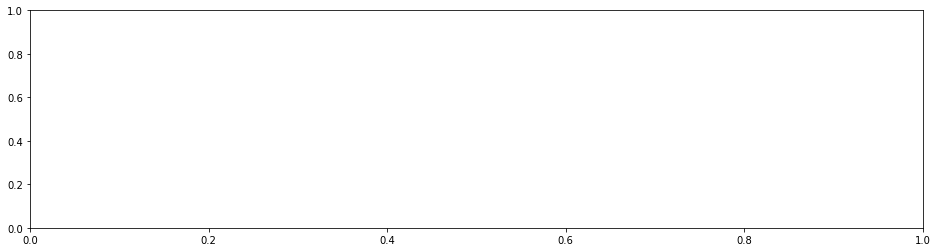

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
sns.barplot(x=sorted_idx, y=rating_diff, ax=ax).set_title("Difference of Ratings between Paid and Free Apps Across App Categories");
rating_diff